In [2]:
import re
import csv
import psutil
import matplotlib.pyplot as plt
import time
import numpy as np

In [3]:

%matplotlib notebook
plt.rcParams['animation.html'] = 'jshtml'


<IPython.core.display.Javascript object>


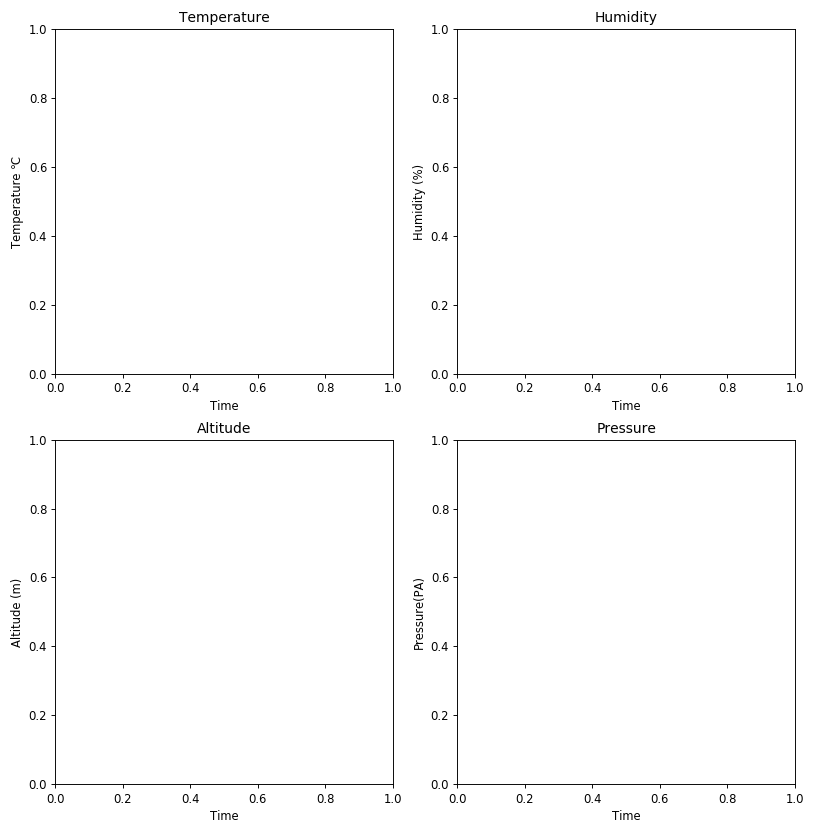

In [4]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(9.8, 10))

axes[0, 0].set_title("Temperature")
axes[0, 0].set_xlabel("Time")
axes[0, 0].set_ylabel("Temperature ℃")

axes[0, 1].set_title("Humidity")
axes[0, 1].set_xlabel("Time")
axes[0, 1].set_ylabel("Humidity (%)")

axes[1, 0].set_title("Altitude")
axes[1, 0].set_xlabel("Time")
axes[1, 0].set_ylabel("Altitude (m)")

axes[1, 1].set_title("Pressure")
axes[1, 1].set_xlabel("Time")
axes[1, 1].set_ylabel("Pressure(PA)")


#axes[0, 1].remove()

fig.tight_layout()
plt.show()


In [4]:
import serial
arduino = serial.Serial('COM3',115200) 
Temperature = []
Humidity = []
Altitude = []
Pressure = []
Cansat1 = []
Cansat2 = []
X = []
i = 1;
Cansat1 = ""
Cansat2 = ""
from OpenGL.GL import *
from OpenGL.GLU import *
import pygame
from pygame.locals import *
import serial
yaw_mode = False
video_flags = OPENGL|DOUBLEBUF
    
pygame.init()
screen = pygame.display.set_mode((640,480), video_flags)
pygame.display.set_caption("Press Esc to quit, z toggles yaw mode")
glViewport(0, 0, 640, 480)
glMatrixMode(GL_PROJECTION)
glLoadIdentity()
gluPerspective(45, 1.0*640/480, 0.1, 100.0)
glMatrixMode(GL_MODELVIEW)
glLoadIdentity()
ax = 1
ay = 1
az =1
glShadeModel(GL_SMOOTH)
glClearColor(0.0, 0.0, 0.0, 0.0)
glClearDepth(1.0)
glEnable(GL_DEPTH_TEST)
glDepthFunc(GL_LEQUAL)
glHint(GL_PERSPECTIVE_CORRECTION_HINT, GL_NICEST)
frames = 0
ticks = pygame.time.get_ticks()

pygame 1.9.6
Hello from the pygame community. https://www.pygame.org/contribute.html


In [5]:

s = str(arduino.readline())
count = 0
while(1):
    try:
        if(1):
            s = str(arduino.readline())
            s = s.replace('b', '').replace('\\', '').replace('r','').replace('n','').replace('\'','')
            writeToCSV = s.replace(' ',',')
            rawdata  = re.split(',', writeToCSV)
            print(rawdata)
            # rawdata index
            # 1=Latitude 2=Longitude 3=Tempurature
            # 4=Pressure 5=Altitude 6=Humidity
            # 7=AccX 8=AccY 9=AccZ 10=GyroX 11=GyroY 12=GyroZ
            data_file = open("data_file.csv","a")
            data_file.write(writeToCSV)
            data_file.write("\n")
            data_file.close() 
            
            lat = float(rawdata[1])
            lon = float(rawdata[2])
            temp = float(rawdata[3])
            press = float(rawdata[4])
            alti = float(rawdata[5])
            humi = float(rawdata[6])
            roll = float(rawdata[10])
            pitch = float(rawdata[11])

            Temperature.append(temp)
            Pressure.append(press)
            Humidity.append(humi)
            Altitude.append(alti)
            print(temp,press,humi,alti)
            X.append(i)
            
            Cansat2+=str(lat)+","+str(lon)+","+str(alti)+"."
            Cansat1+=str(lat+0.001)+","+str(lon+0.001)+","+str(alti+0.001)+"."

            with open ("position1.kml","w") as pos:
                pos.write("""<?xml version="1.0" encoding="UTF-8"?>
        <kml xmlns="http://www.opengis.net/kml/2.2">
          <Document>
            <name>Paths</name>
            <description>Examples of paths. Note that the tessellate tag is by default
              set to 0. If you want to create tessellated lines, they must be authored
              (or edited) directly in KML.</description>

            <Style id="yellowLineGreenPoly">
              <LineStyle>
                <color>7f00ffff</color>
                <width>4</width>
              </LineStyle>
              <PolyStyle>
                <color>5014F00A</color>
              </PolyStyle>
            </Style>

    
            <Placemark>
              <name>Absolute Extruded</name>
              <description>Transparent green wall with yellow outlines</description>
              <styleUrl>#yellowLineGreenPoly</styleUrl>
              <LineString>
                <extrude>1</extrude>
                <tessellate>1</tessellate>
                <altitudeMode>absolute</altitudeMode>
                <coordinates> %s
                </coordinates>
              </LineString>
            </Placemark>

           """ % (Cansat2))

            axes[0, 0].plot(X,Temperature, color='r')
            axes[0, 1].plot(X,Humidity, color='b')
            axes[1, 0].plot(X,Altitude, color='g')
            axes[1, 1].plot(X,Pressure, color='y')
            fig.canvas.draw()
            i+=1
        time.sleep(0.5)
        
        count+=1
    except KeyboardInterrupt:
        print("KeyboardInterrupt has been caught.")


['248', '0.000000', '0.000000', '30.21', '100578.00', '62.37', '45', '179.07', '-31.14']


IndexError: list index out of range

ValueError: could not convert string to float: 'Rcv'

In [5]:
Cansat1+=str(lon)+","+str(lat)+","+str(alti)+"."
        Cansat2+=str(lat+0.001)+","+str(lon+0.001)+","+str(alti+0.001)+"."

        with open ("position.kml","w") as pos:
            pos.write("""<?xml version="1.0" encoding="UTF-8"?>
    <kml xmlns="http://www.opengis.net/kml/2.2">
      <Document>
        <name>Paths</name>
        <description>Examples of paths. Note that the tessellate tag is by default
          set to 0. If you want to create tessellated lines, they must be authored
          (or edited) directly in KML.</description>

        <Style id="yellowLineGreenPoly">
          <LineStyle>
            <color>7f00ffff</color>
            <width>4</width>
          </LineStyle>
          <PolyStyle>
            <color>5014F00A</color>
          </PolyStyle>
        </Style>

        <Style id="blueLineGreenPoly">
          <LineStyle>
            <color>5014F00A</color>
            <width>4</width>
          </LineStyle>
          <PolyStyle>
            <color>50F00A14</color>
          </PolyStyle>
        </Style>

        <Placemark>
          <name>Absolute Extruded</name>
          <description>Transparent green wall with yellow outlines</description>
          <styleUrl>#yellowLineGreenPoly</styleUrl>
          <LineString>
            <extrude>1</extrude>
            <tessellate>1</tessellate>
            <altitudeMode>absolute</altitudeMode>
            <coordinates> %s
            </coordinates>
          </LineString>
        </Placemark>

        <Placemark>
          <name>Absolute Extruded</name>
          <description>Transparent green wall with yellow outlines</description>
          <styleUrl>#blueLineGreenPoly</styleUrl>
          <LineString>
            <extrude>1</extrude>
            <tessellate>1</tessellate>
            <altitudeMode>absolute</altitudeMode>
            <coordinates> %s
            </coordinates>
          </LineString>
        </Placemark>
      </Document>
    </kml>""" % (Cansat1,Cansat2))
            
        Cansat1+=" "
        Cansat2+=" "
        #time.sleep(0.5)

IndentationError: unexpected indent (<ipython-input-5-7ca1a2fbbce2>, line 2)

In [87]:
while i<50:
    x.append(i)
    y.append(psutil.cpu_percent())
    axes[0, 0].plot(x, y, color='b')
    
    fig.canvas.draw()
    
    axes[0, 0].set_xlim(left=max(0, i-50), right=i+50)
    time.sleep(0.1)
    i += 1


<IPython.core.display.Javascript object>


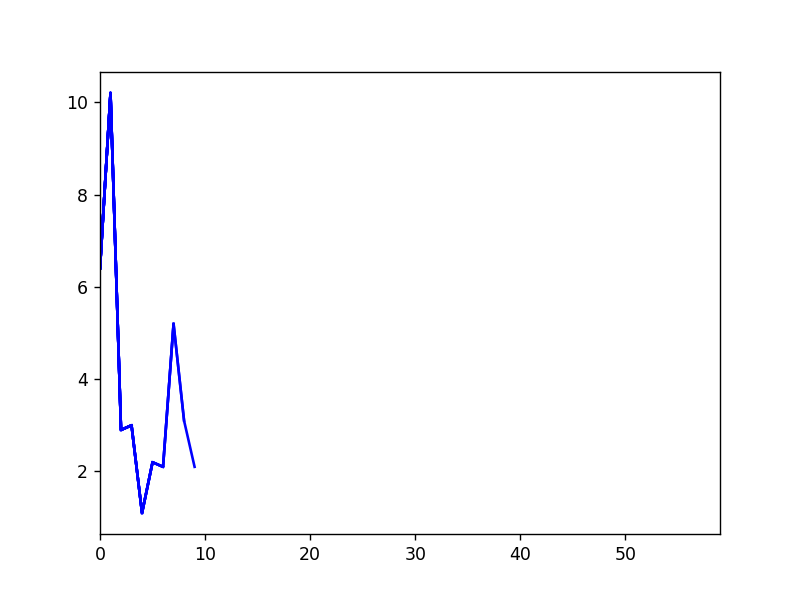

In [53]:
fig = plt.figure()
ax = fig.add_subplot(111)
fig.show()
i = 0
x, y = [], []

while i<10:
    x.append(i)
    y.append(psutil.cpu_percent())
    ax.plot(x, y, color='b')
    
    fig.canvas.draw()
    
    ax.set_xlim(left=max(0, i-50), right=i+50)
    
    time.sleep(0.1)
    i += 1


In [ ]:
plt.close()

SerialException: could not open port 'COM5': FileNotFoundError(2, 'The system cannot find the file specified.', None, 2)

In [194]:
Cansat1 = ""
Cansat2 = ""

In [190]:
i=0
lat=100.01
lon=13.01

alti = 100
s = ""
Cansat1 = ""
Cansat2 = ""
while(i<10):
    
    Cansat1+=str(lat)+","+str(lon)+","+str(alti)+"."
    Cansat2+=str(lat+0.001)+","+str(lon+0.001)+","+str(alti+0.001)+"."
    lat+=0.00004
    lon+=0.00003
    alti+=29
    i+=1
    with open ("position.kml","w") as pos:
        pos.write("""<?xml version="1.0" encoding="UTF-8"?>
<kml xmlns="http://www.opengis.net/kml/2.2">
  <Document>
    <name>Paths</name>
    <description>Examples of paths. Note that the tessellate tag is by default
      set to 0. If you want to create tessellated lines, they must be authored
      (or edited) directly in KML.</description>
    
    <Style id="yellowLineGreenPoly">
      <LineStyle>
        <color>7f00ffff</color>
        <width>4</width>
      </LineStyle>
      <PolyStyle>
        <color>5014F00A</color>
      </PolyStyle>
    </Style>
    
    <Style id="blueLineGreenPoly">
      <LineStyle>
        <color>50F00A14</color>
        <width>4</width>
      </LineStyle>
      <PolyStyle>
        <color>50F00A14</color>
      </PolyStyle>
    </Style>
    
    <Placemark>
      <name>Absolute Extruded</name>
      <description>Transparent green wall with yellow outlines</description>
      <styleUrl>#yellowLineGreenPoly</styleUrl>
      <LineString>
        <extrude>1</extrude>
        <tessellate>1</tessellate>
        <altitudeMode>absolute</altitudeMode>
        <coordinates> %s
        </coordinates>
      </LineString>
    </Placemark>
    
    <Placemark>
      <name>Absolute Extruded</name>
      <description>Transparent green wall with yellow outlines</description>
      <styleUrl>#blueLineGreenPoly</styleUrl>
      <LineString>
        <extrude>1</extrude>
        <tessellate>1</tessellate>
        <altitudeMode>absolute</altitudeMode>
        <coordinates> %s
        </coordinates>
      </LineString>
    </Placemark>
  </Document>
</kml>""" % (Cansat1,Cansat2))
    Cansat1+=" "
    Cansat2+=" "
    time.sleep(0.5)